In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, norm
from functools import partial

In [77]:
def interval_a(scale, n, gamma):
    nd = np.random.normal(0, scale, n)
    nd = np.sum([ndi ** 2 for ndi in nd])
    first_quantile = chi2.ppf((gamma + 1) / 2, df=n)
    second_quantile = chi2.ppf((1 - gamma) / 2, df=n)
    return (nd / second_quantile) - (nd / first_quantile)

In [78]:
def interval_b(scale, n, gamma):
    nd = np.random.normal(0, scale, n)
    nd = np.mean(nd) ** 2
    first_quantile = norm.ppf((gamma + 3) / 4) ** 2 # loc=0, scale=1
    second_quantile = norm.ppf((3 - gamma) / 4) ** 2
    return n * nd / second_quantile - n * nd / first_quantile

In [83]:
def plot(scale, n, gamma, interval, title):
    x = np.arange(1, n, 10)
    y = [interval(scale, ni, gamma) for ni in x]
    plt.plot(x, y)
    plt.ylabel('Length of the interval'),plt.xlabel('Sample size'), plt.title(f"{title} scale={scale}, gamma={gamma}")
    plt.show()

In [84]:
scales = [0.1, 1]
gammas = [0.05, 0.45]
int_a = partial(interval_a)
int_b = partial(interval_b)

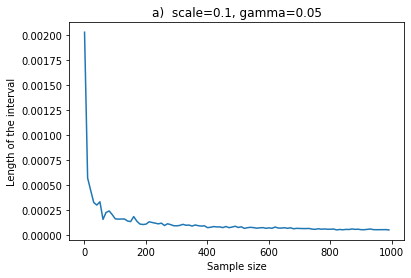

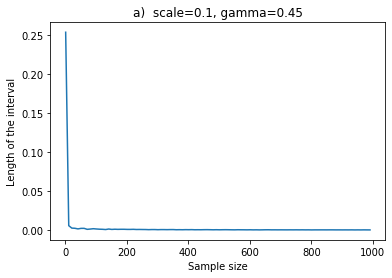

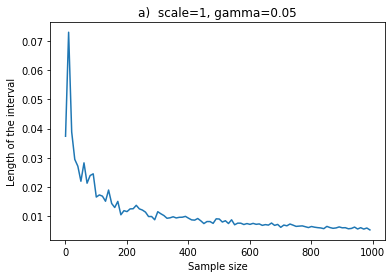

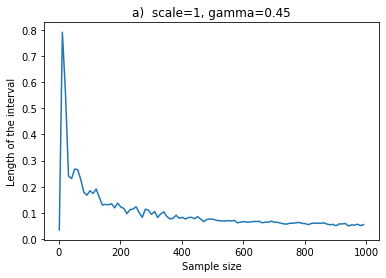

In [85]:
for scalei in scales:
    for gammai in gammas:
        plot(scalei, 1000, gammai, int_a, "a) ")

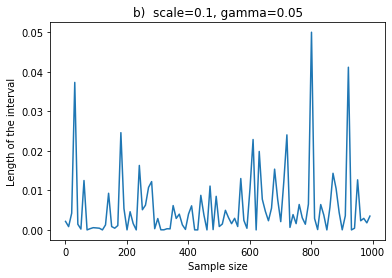

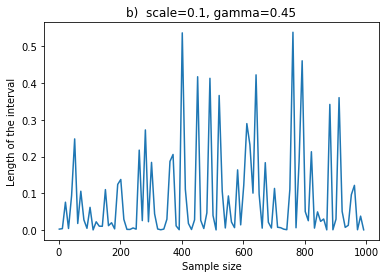

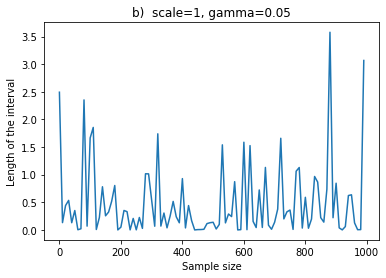

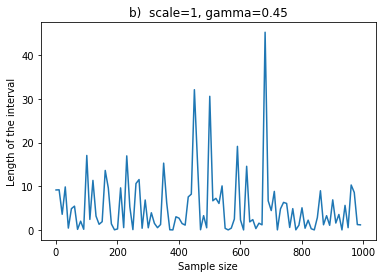

In [86]:
for scalei in scales:
    for gammai in gammas:
        plot(scalei, 1000, gammai, int_b, "b) ")

Из двух представленых интервалов, при фиксированных $scale$ и $gamma$, предпочтительнее использовать первый интервал - длина уменьшается, при увеличении объема выборки, в то время как у второго интервала такого не наблюдается. 